# APLICACIÓN DE PCA + CLUSTER

### Proyecto: Análisis y predicción de la deserción de estudiantes en la Universidad Peruana Unión

In [25]:
import numpy as np
import pandas as pd
# ==========================
# CARGANDO DATOS
# ==========================
data = pd.read_csv("upeu_data_desercion.csv")  # asegúrate que 'State' exista

In [26]:
#Resumen de la data
data.info
print('df.columns:',data.columns)
print('df.shape:',data.shape)
data.head(10)

df.columns: Index(['Nombres Completos', 'Género', 'Modo de solicitud',
       'Orden de solicitud', 'Facultad', 'Trasladado(a)',
       'Necesidades educativas especiales', 'Procedencia', 'Vivienda',
       'Crianza Adventista', 'Estado civil', 'Titulación de la madre',
       'Titulación del padre', 'Ocupación de la madre', 'Ocupación del padre',
       'Formas de Pago', 'Descuento', 'Deuda', 'Matrícula al día', 'Becario',
       'Edad', 'Unidades curriculares 1.º semestre (matriculadas)',
       'Unidades curriculares 1.º semestre (evaluadas)',
       'Unidades curriculares 1.º semestre (aprobadas)',
       'Desarrollo de Tareas (%)', 'Asistencia (%)',
       'Promedio ponderado del semestre', 'Situación laboral',
       'Condición Final',
       '¿La distancia y la separación de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?',
       '¿La incompatibilidad entre mis horarios de trabajo y las clases me llevaría a abandonar la carrera.?',
      

,Nombres Completos,Género,Modo de solicitud,Orden de solicitud,Facultad,Trasladado(a),Necesidades educativas especiales,Procedencia,Vivienda,Crianza Adventista,...,"¿La falta de recursos económicos, becas o facilidades de pago me haría interrumpir mis estudios?","¿Me siento poco integrado/a con mis compañeros y actividades universitarias, lo que me hace pensar en abandonar?","¿El estrés, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?",¿La falta de seguridad dentro o cerca del campus influye en mi intención de abandonar?,¿La retroalimentación tardía o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?,¿La carrera/facultad donde estoy matriculado no cumple mis expectativas y me hace pensar en retirarme?,¿La dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?,¿Cuento con poco apoyo familiar para continuar mis estudios y eso me hace considerar el abandono?,"¿Me cuesta adaptarme a la cultura y normas institucionales, lo que afecta mi permanencia?","¿No veo una trayectoria profesional clara a partir de mi carrera actual, por lo que consideraría retirarme?"
0,Diana Ramírez Aguilar,M,Ingreso directo,Segunda Opción,Teología,Sí,No,Provincia,Residencia,No,...,5,2,3,5,2,3,3,4,4,2
1,Andrés Sánchez Suárez,H,Examen de admisión ordinario,Segunda Opción,Ciencias de la Salud,No,No,Lima,Alquila cuarto,Sí,...,5,3,2,1,1,5,2,3,5,5
2,Pedro Torres Sánchez,H,Examen de admisión ordinario,Primera Opción,Ciencias Humanas y Educación,No,No,Lima,Familiares,Sí,...,2,1,3,3,4,5,5,1,5,3
3,Miguel Vargas Martínez,H,Ingreso directo,Primera Opción,Ciencias Empresariales,No,No,Provincia,Familiares,Sí,...,4,3,1,2,2,4,3,1,4,1
4,Jorge Rojas Ramírez,H,Examen de admisión ordinario,Primera Opción,Ciencias Humanas y Educación,No,No,Lima,Residencia,Sí,...,5,5,1,3,2,2,4,5,5,3
5,Patricia Pérez Flores,M,Examen de admisión ordinario,Tercera Opción,Ciencias Empresariales,No,No,Lima,Familiares,Sí,...,3,1,4,1,3,2,5,1,1,1
6,Karla Martínez Mendoza,M,Examen de admisión ordinario,Segunda Opción,Ciencias Empresariales,No,No,Provincia,Residencia,Sí,...,2,1,1,3,5,2,4,3,5,4
7,Miguel Castro Mendoza,H,Ingreso por reingreso,Segunda Opción,Ciencias de la Salud,No,Sí,Lima,Familiares,Sí,...,1,1,1,5,1,2,2,1,3,2
8,Jessica Gonzales López,M,Ingreso directo,Primera Opción,Ciencias de la Salud,No,No,Lima,Residencia,Sí,...,3,1,5,2,5,1,5,1,4,5
9,Claudia Suárez Romero,M,Ingreso por convenio o beca especial,Tercera Opción,Ciencias Empresariales,No,No,Lima,Residencia,Sí,...,3,4,4,3,1,4,5,4,2,1


In [27]:
# 2) Eliminar la variable duplicada del target - con esto estoy eliminando la variable target_deserto porque me esta generando problemas para las métricas
#data = data.drop(columns=["target_deserto"], errors="ignore")
#print('target_deserto eliminado de la data')

In [28]:
#Resumen estadístico de todas las variables (describe()).
data.describe(include="all").T # incluye categóricas y numéricas

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Nombres Completos,5000,4481,Rosa Martínez Torres,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Género,5000,2,M,2750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Modo de solicitud,5000,6,Examen de admisión ordinario,3008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Orden de solicitud,5000,3,Primera Opción,3458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Facultad,5000,5,Ciencias Empresariales,1479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trasladado(a),5000,2,No,4494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Necesidades educativas especiales,5000,2,No,4862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Procedencia,5000,3,Lima,2729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vivienda,5000,3,Familiares,2471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crianza Adventista,5000,2,Sí,3231,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Separar los datos segú sus Tipos de variables (numéricas, categóricas). fechas se considera como cat aunque también puedes separr
numeric_data = data.select_dtypes(include=[np.number])
categor_data = data.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],categor_data.shape[1]))

There are 22 numeric and 20 categorical columns in train data


In [30]:
numeric_data.describe().T
# Puedes ver la Distribución de variables numéricas (cantidad o freq, media, mediana, desviación estándar, mín, máx. etc.).

,count,mean,std,min,25%,50%,75%,max
Descuento,5000.0,498.158632,346.624256,5.51,244.1675,415.49,671.2800,2537.31
Deuda,5000.0,960.131896,885.856249,0.87,331.0125,712.79,1291.5225,8000.00
Edad,5000.0,21.595400,3.072065,16.00,19.0000,22.00,24.0000,33.00
Unidades curriculares 1.º semestre (matriculadas),5000.0,5.999200,1.410389,4.00,5.0000,6.00,7.0000,8.00
Unidades curriculares 1.º semestre (evaluadas),5000.0,5.502000,1.513953,3.00,4.0000,5.00,7.0000,8.00
Unidades curriculares 1.º semestre (aprobadas),5000.0,3.511800,1.331546,1.00,3.0000,3.00,4.0000,8.00
Desarrollo de Tareas (%),5000.0,79.186820,10.126950,38.30,72.5000,79.30,86.1250,100.00
Asistencia (%),5000.0,84.553320,8.251159,50.60,79.0000,84.70,90.5000,100.00
Promedio ponderado del semestre,5000.0,12.746932,2.990212,5.00,10.7100,12.76,14.8000,20.00
¿La distancia y la separación de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?,5000.0,2.976800,1.502902,1.00,2.0000,3.00,4.0000,5.00


In [31]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   Descuento                                                                                                                 5000 non-null   float64
 1   Deuda                                                                                                                     5000 non-null   float64
 2   Edad                                                                                                                      5000 non-null   int64  
 3   Unidades curriculares 1.º semestre (matriculadas)                                                                         5000 non-nu

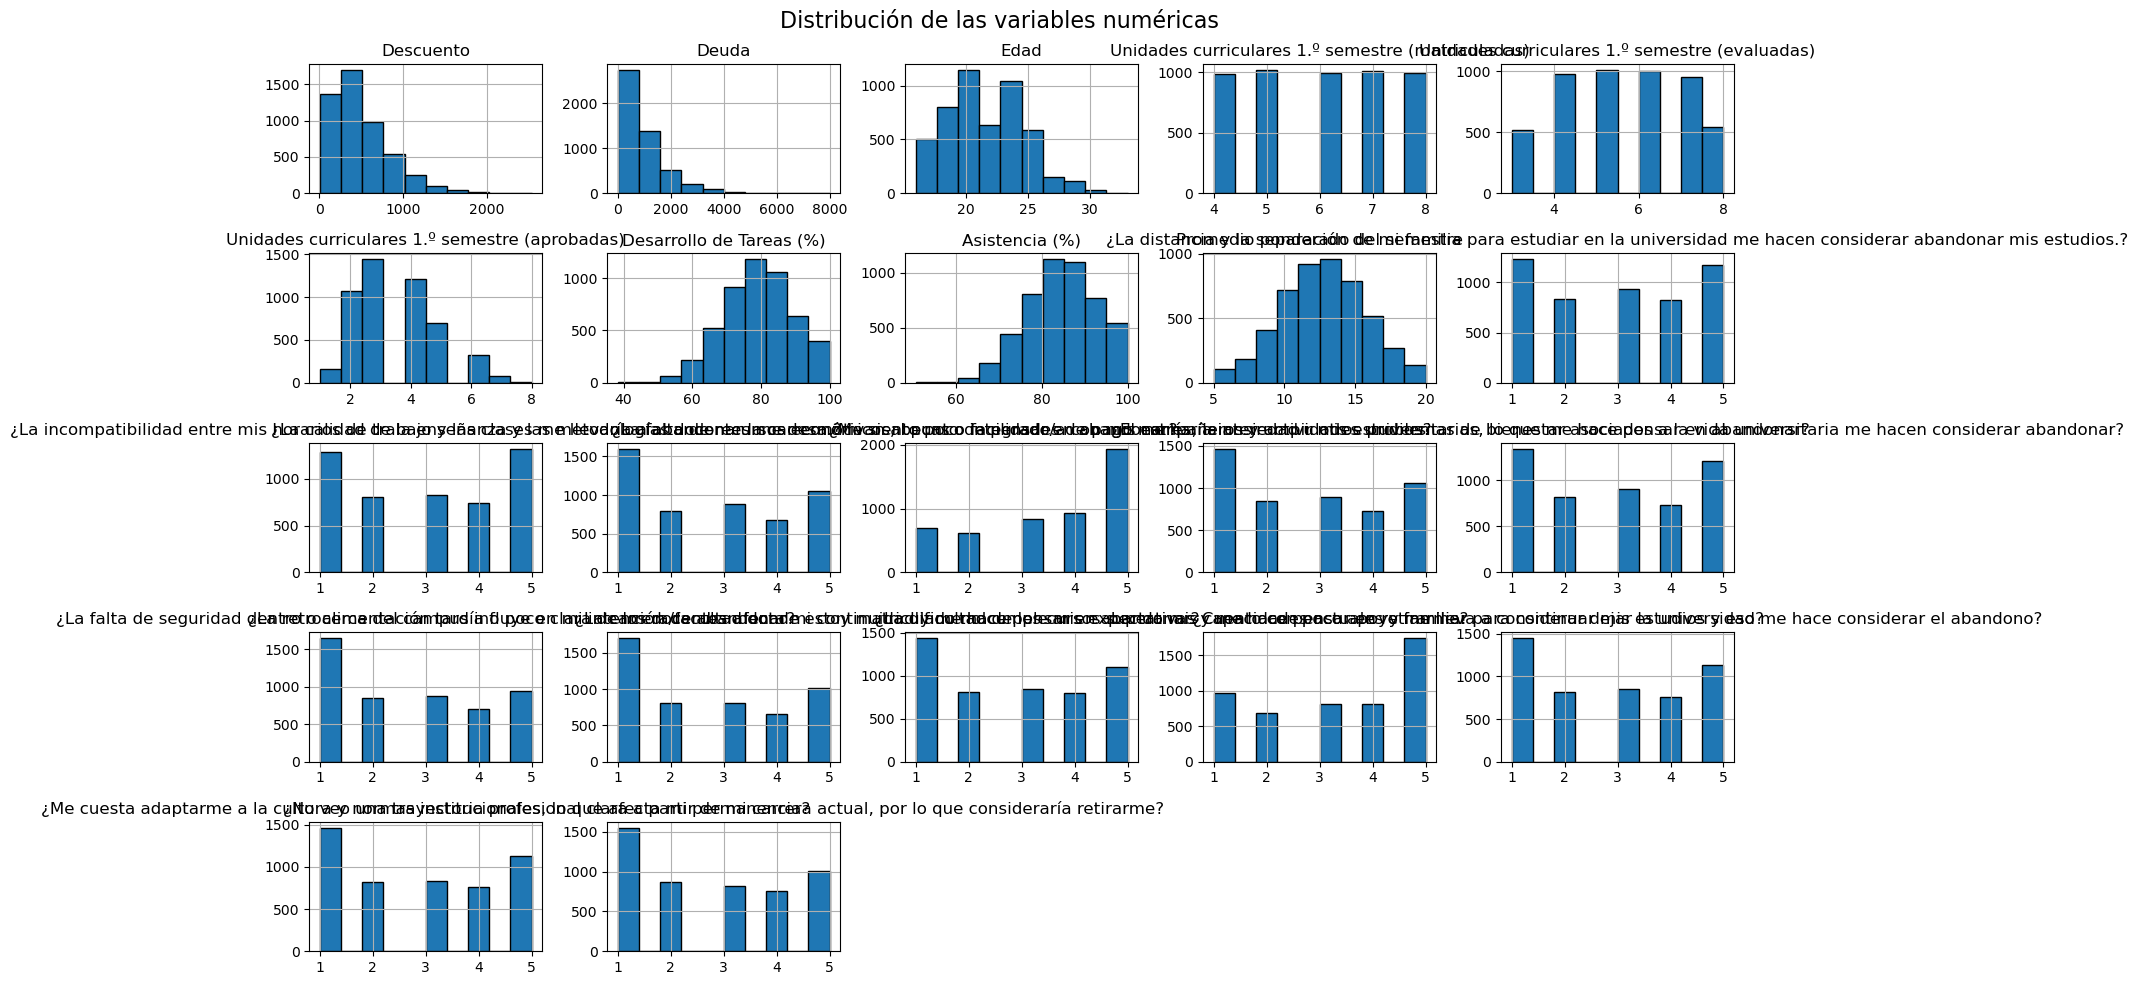

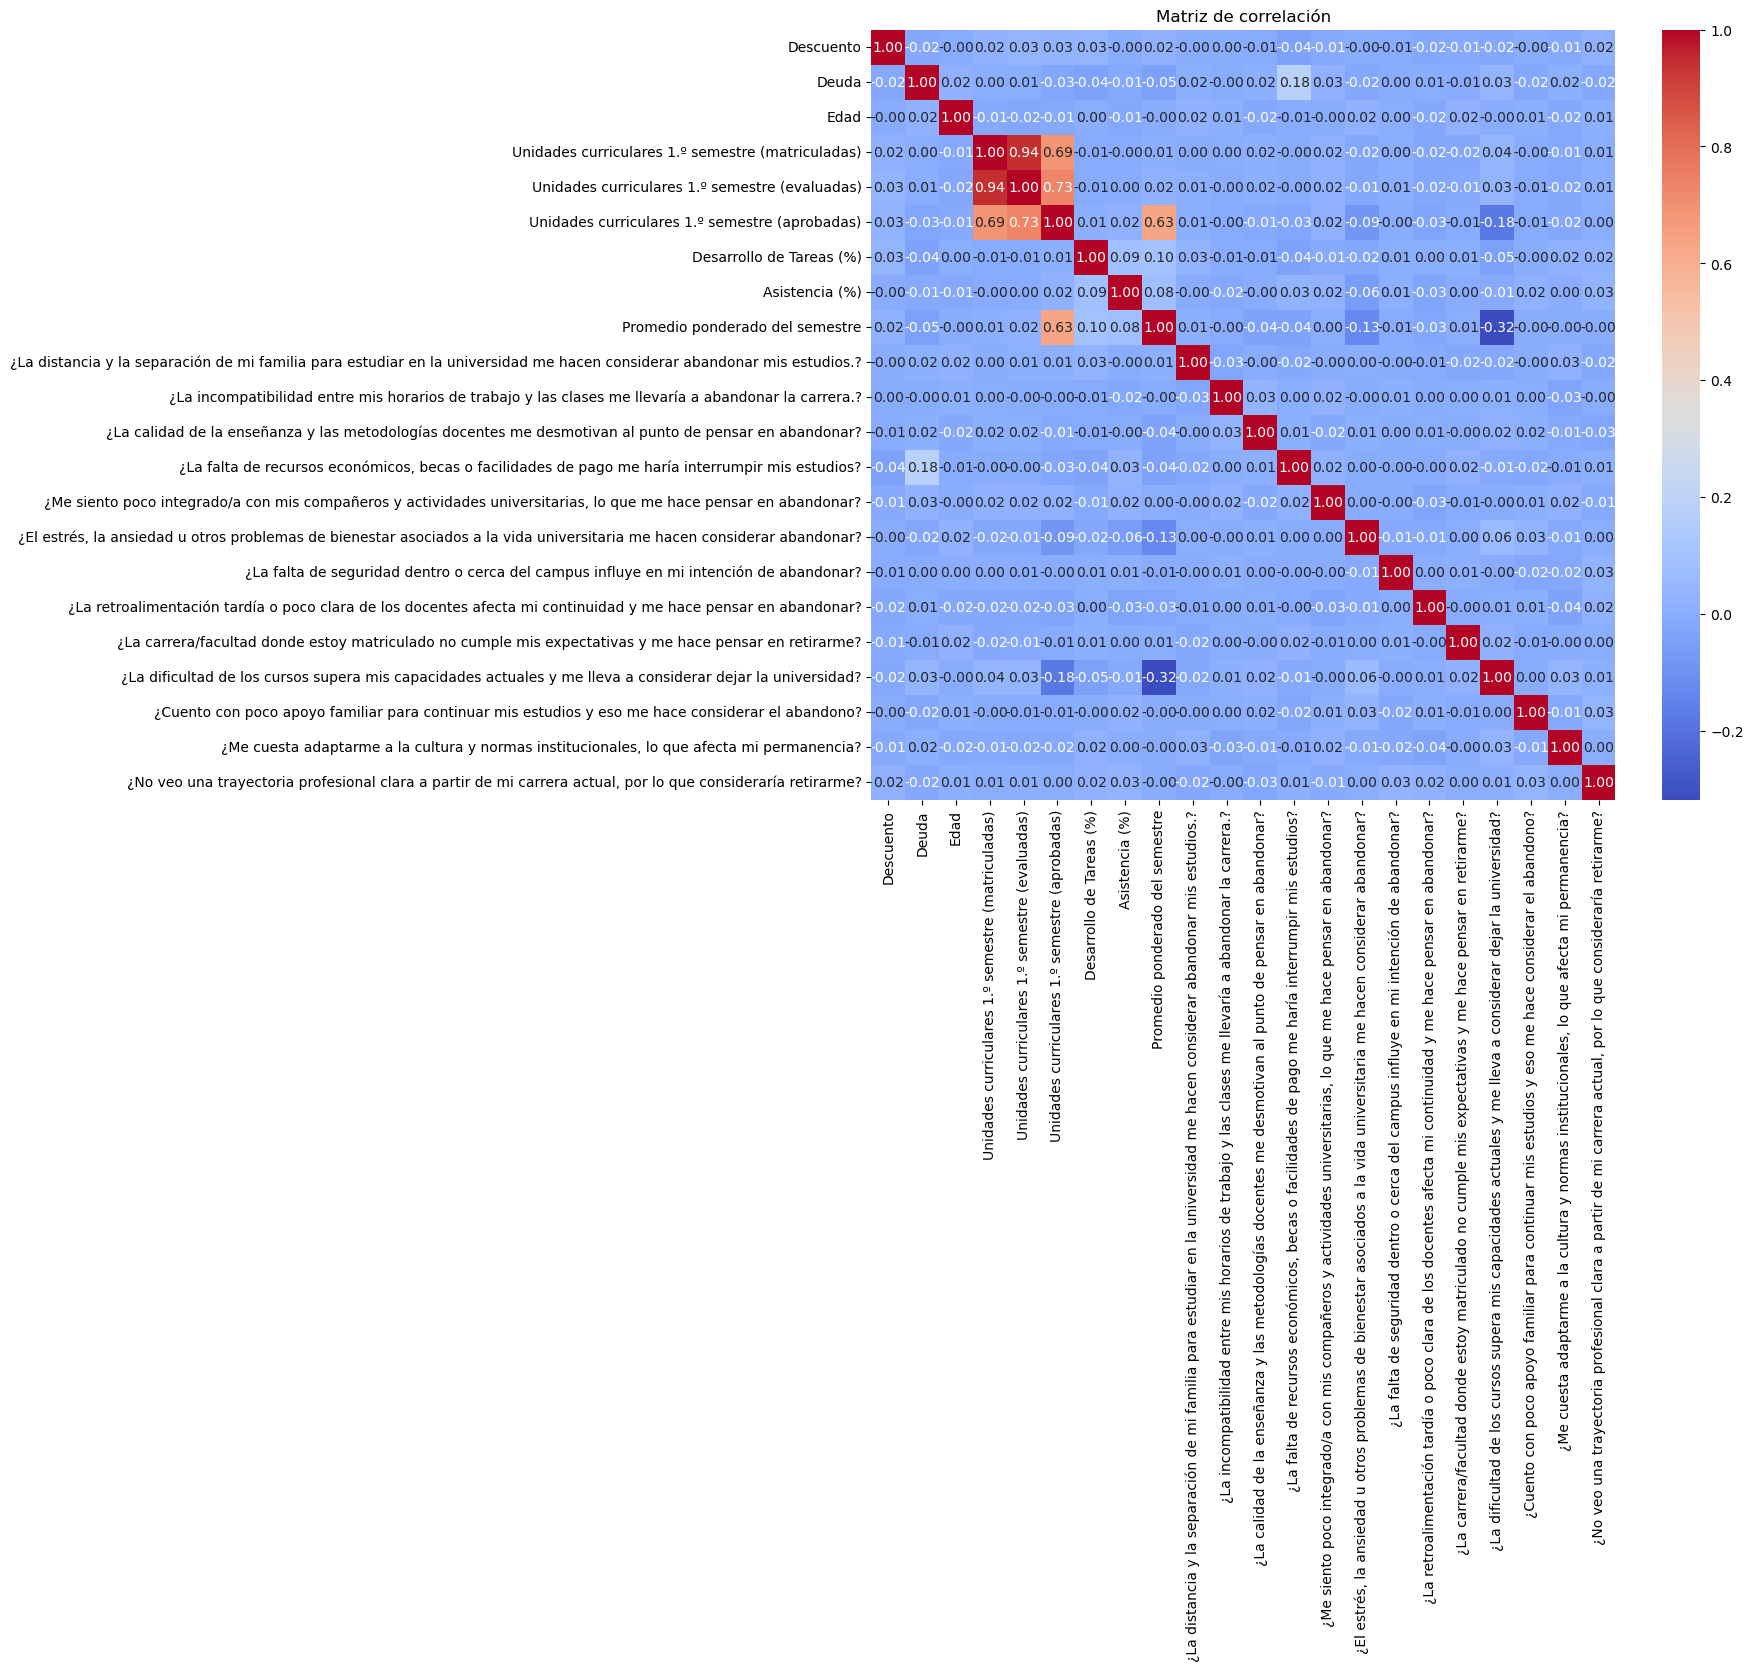

In [32]:
# Histogramas
import matplotlib.pyplot as plt
numeric_data.hist(figsize=(15, 10), bins=10, edgecolor='black')
plt.suptitle("Distribución de las variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()
# Heatmap de correlación
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [33]:

#Antes de realizar PCA, escalamos la data
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy import stats

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)# Escalar los datos numéricos (importante para PCA y K-Means)


In [34]:
pca = PCA()
pca.fit(scaled_data)
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

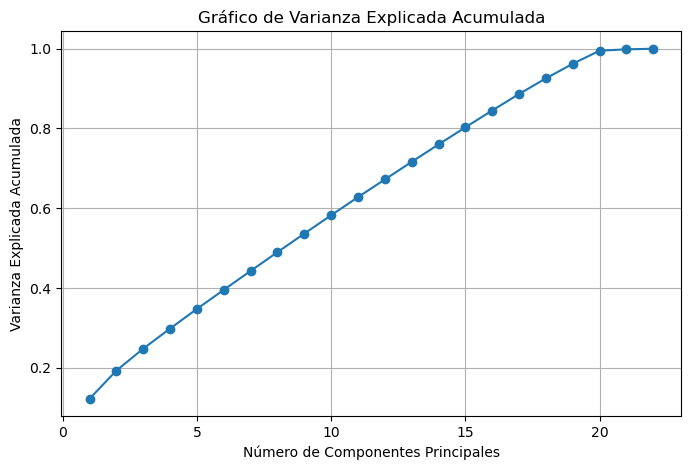

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Gráfico de Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

--- Pruebas de Adecuación para PCA ---
Determinante de la matriz de correlación: 0.006720
KMO general: 0.5326

--- Tabla de Varianza Explicada ---
   Componente  Autovalor  Varianza %  Acumulado %
0          C1       2.69       12.23        12.23
1          C2       1.55        7.06        19.29
2          C3       1.21        5.49        24.78
3          C4       1.11        5.04        29.82
4          C5       1.09        4.93        34.75
5          C6       1.05        4.78        39.53
6          C7       1.04        4.74        44.28
7          C8       1.04        4.71        48.98
8          C9       1.02        4.65        53.63
9         C10       1.01        4.61        58.24
10        C11       1.00        4.54        62.78
11        C12       0.97        4.43        67.21
12        C13       0.97        4.42        71.63
13        C14       0.96        4.36        75.98
14        C15       0.95        4.30        80.28
15        C16       0.93        4.22        84.50
16 

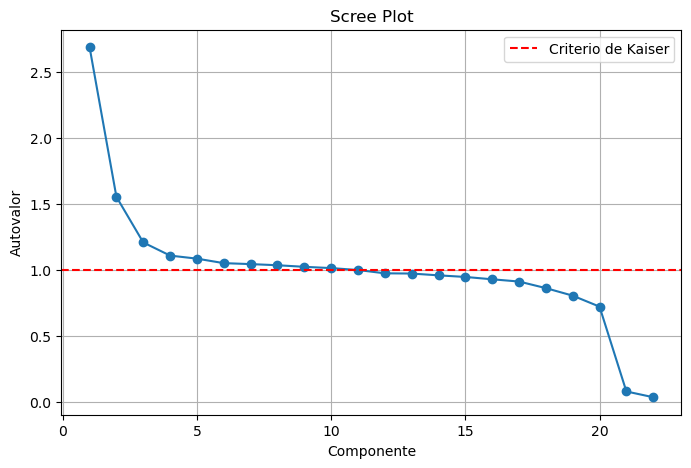

Componentes a retener según el criterio de Kaiser: 10

--- Matriz de Cargas (Loadings) ---
                                                    Componente_1  \
Descuento                                                  0.033   
Deuda                                                     -0.018   
Edad                                                      -0.016   
Unidades curriculares 1.º semestre (matriculadas)          0.542   
Unidades curriculares 1.º semestre (evaluadas)             0.553   
Unidades curriculares 1.º semestre (aprobadas)             0.568   
Desarrollo de Tareas (%)                                   0.021   
Asistencia (%)                                             0.021   
Promedio ponderado del semestre                            0.247   
¿La distancia y la separación de mi familia par...         0.009   
¿La incompatibilidad entre mis horarios de trab...        -0.004   
¿La calidad de la enseñanza y las metodologías ...        -0.001   
¿La falta de recursos eco

In [36]:
# --- Paso 1: Pruebas de Esfericidad y Muestreo (Pre-PCA) ---
# Se utilizan para verificar si los datos son adecuados para PCA
from factor_analyzer.factor_analyzer import calculate_kmo

data_columns = ['Descuento', 'Deuda', 'Edad', 'Unidades curriculares 1.º semestre (matriculadas)',
               'Unidades curriculares 1.º semestre (evaluadas)','Unidades curriculares 1.º semestre (aprobadas)',
                'Desarrollo de Tareas (%)','Asistencia (%)','Promedio ponderado del semestre',
                '¿La distancia y la separación de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?',
                '¿La incompatibilidad entre mis horarios de trabajo y las clases me llevaría a abandonar la carrera.?',
               '¿La calidad de la enseñanza y las metodologías docentes me desmotivan al punto de pensar en abandonar?',
                '¿La falta de recursos económicos, becas o facilidades de pago me haría interrumpir mis estudios?',
                '¿Me siento poco integrado/a con mis compañeros y actividades universitarias, lo que me hace pensar en abandonar?',
                '¿El estrés, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?',
                '¿La falta de seguridad dentro o cerca del campus influye en mi intención de abandonar?',
                '¿La retroalimentación tardía o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?',
                '¿La carrera/facultad donde estoy matriculado no cumple mis expectativas y me hace pensar en retirarme?',
               '¿La dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?',
                '¿Cuento con poco apoyo familiar para continuar mis estudios y eso me hace considerar el abandono?',
                '¿Me cuesta adaptarme a la cultura y normas institucionales, lo que afecta mi permanencia?',
                '¿No veo una trayectoria profesional clara a partir de mi carrera actual, por lo que consideraría retirarme?'] 

print("--- Pruebas de Adecuación para PCA ---")

# Determinante de la matriz de correlación
# Un determinante cercano a 0 indica alta correlación entre variables
correlation_matrix = np.corrcoef(scaled_data.T)
print(f"Determinante de la matriz de correlación: {np.linalg.det(correlation_matrix):.6f}")

# KMO (Kaiser-Meyer-Olkin)
# Un valor > 0.6 es considerado aceptable para aplicar PCA
_, kmo = calculate_kmo(scaled_data)
print(f"KMO general: {kmo:.4f}\n")


# --- Paso 2: Ejecutar PCA completo y analizar resultados ---
pca = PCA()
pca.fit(scaled_data)
autovalores = pca.explained_variance_

# Crear la tabla de varianza explicada
var_exp = pd.DataFrame({
    "Componente": [f"C{i+1}" for i in range(len(autovalores))],
    "Autovalor": autovalores,
    "Varianza %": pca.explained_variance_ratio_ * 100,
    "Acumulado %": np.cumsum(pca.explained_variance_ratio_) * 100
})

print("--- Tabla de Varianza Explicada ---")
print(var_exp.round(2))
print("\n")


# --- Paso 3: Visualizar con el Scree Plot ---
# Muestra cuánta varianza explica cada componente individualmente
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(autovalores) + 1), autovalores, marker='o')
plt.axhline(y=1, color='red', linestyle='--', label='Criterio de Kaiser')
plt.title("Scree Plot")
plt.xlabel("Componente")
plt.ylabel("Autovalor")
plt.legend()
plt.grid(True)
plt.show()


# --- Paso 4: Matriz de Cargas (Loadings) de los componentes ---
# Muestra la relación entre las variables originales y los nuevos componentes
# Se usa el criterio de Kaiser (Autovalor > 1) para decidir cuántos componentes retener
n_retener = sum(autovalores > 1)
print(f"Componentes a retener según el criterio de Kaiser: {n_retener}\n")

cargas = pd.DataFrame(
    pca.components_.T[:, :n_retener],
    columns=[f"Componente_{i+1}" for i in range(n_retener)],
    index=data_columns # Asegúrate de que esta variable tenga los nombres de tus columnas
)

print("--- Matriz de Cargas (Loadings) ---")
print(cargas.round(3))

Resultados:
- Determinante de la matriz de correlación: El determinante es 0.006720, lo que indica que hay una alta correlación entre las variables. Esto es bueno para PCA, ya que PCA funciona mejor cuando las variables están correlacionadas entre sí.
- KMO general: El valor de KMO es 0.5326, lo que está por debajo del umbral recomendado de 0.6. Aunque no es el valor más alto, todavía es aceptable para aplicar PCA, pero sería ideal tener un valor mayor a 0.6 para asegurarse de que las variables sean adecuadas para PCA.

Como se puede ver, solo se quedó con 10 componentes retenidos:

**Los autovalores son:**
- `C1: 2.69`
- `C2: 1.55`
- `C3: 1.21`
- `C4: 1.11`
- `C5: 1.09`
- `C6: 1.05`
- `C7: 1.04`
- `C8: 1.04`
- `C9: 1.02`
- `C10: 1.01`

Esto significa que solo los primeros 10 componentes son los que explican una proporción significativa de la varianza. Además, esto lo verifica el criterio de Kaiser que recomienda retener solo 10 primeros componentes para capturar la mayor parte de la varianza (58.24% de la varianza explicada).

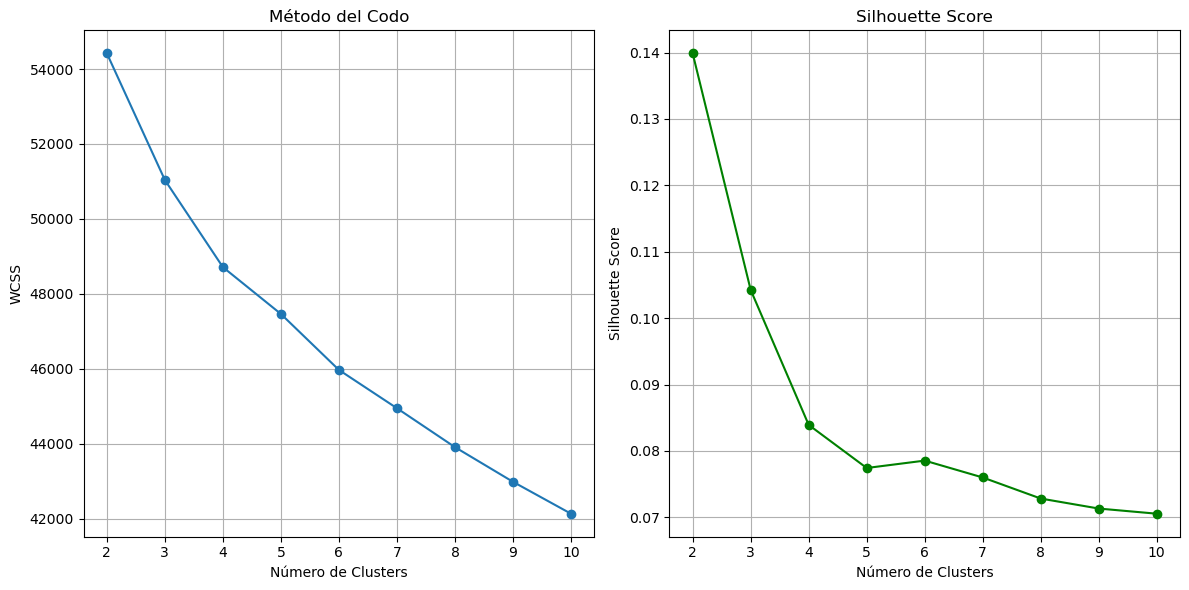

In [40]:
from sklearn.metrics import silhouette_score

#Seleccionamos la cantidad de componente principales
pca = PCA(n_components=10)
X_pca = pca.fit_transform(scaled_data)

# Usamos los primeros 10 componentes principales (X_pca con 10 componentes)
X_pca_10 = X_pca[:, :10]

# Almacenar WCSS (Suma dentro de los cuadrados de los clusters)
wcss = []
sil_scores = []

# Probar con diferentes valores de k (de 2 a 10)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_10)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_pca_10, kmeans.labels_))

# Graficar el Método del Codo
plt.figure(figsize=(12, 6))

# WCSS
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.grid(True)

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), sil_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()

- Método del codo: La reducción en WCSS (within-cluster sum of squares) es pronunciada al pasar de 2 clusters a 3 clusters, pero después de eso, la mejora se va estabilizando de manera mucho más gradual. Esto indica que el punto óptimo para el número de clusters según este criterio es 2 o 3.
- Método de la Silueta: El Silhouette Score es más alto para 2 clusters, con un valor cercano a 0.14, pero luego disminuye significativamente al aumentar el número de clusters. Esto indica que el modelo con 2 clusters es el que mejor ajusta los datos en términos de calidad de agrupamiento.

### CONCLUSIÓN
Si se prioriza la reducción de la variabilidad (capturando más de los datos), podrías optar por 3 clusters. Si priorizas la calidad del agrupamiento, 2 clusters parecen ser la mejor opción.

Centros de los clusters:
[[ 1.39976109 -0.18681614 -0.00934179  0.00612454  0.00817037  0.010222
  -0.01030996 -0.00347197  0.00477121 -0.01399465]
 [-1.3535062   0.18064283  0.00903309 -0.00592215 -0.00790038 -0.00988421
   0.00996927  0.00335724 -0.00461354  0.01353219]]


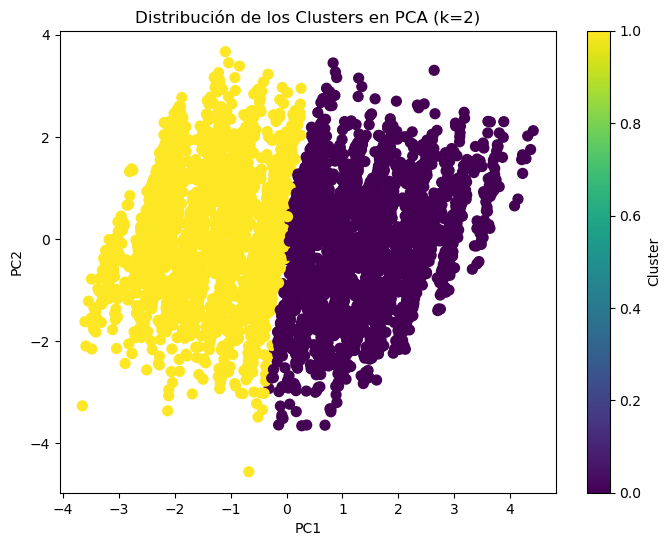

In [41]:
# Aplicando K-Means con el número de clusters óptimo
kmeans = KMeans(n_clusters=2, random_state=42)  # clusters según el codo
kmeans.fit(X_pca_10)

# Asignar las etiquetas de los clusters al dataframe
numeric_data["Cluster"] = kmeans.labels_

# Obtener los centros de los clusters
cluster_centers = kmeans.cluster_centers_
print(f"Centros de los clusters:\n{cluster_centers}")

# Visualizar el resultado en el espacio de las dos primeras componentes principales (PCA)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_10[:, 0], X_pca_10[:, 1], c=kmeans.labels_, cmap="viridis", s=50)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Distribución de los Clusters en PCA (k=2)")
plt.colorbar(label="Cluster")
plt.show()

In [44]:
# Ahora eliminar la columna 'Cluster' antes de realizar PCA o cualquier análisis posterior
numeric_data_without_cluster = numeric_data.drop(columns=['Cluster'])

# Aplicar PCA con las variables numéricas originales (sin la columna 'Cluster')
pca = PCA(n_components=10)
X_pca_10 = pca.fit_transform(numeric_data_without_cluster)

numeric_data_without_cluster.describe().T

,count,mean,std,min,25%,50%,75%,max
Descuento,5000.0,498.158632,346.624256,5.51,244.1675,415.49,671.2800,2537.31
Deuda,5000.0,960.131896,885.856249,0.87,331.0125,712.79,1291.5225,8000.00
Edad,5000.0,21.595400,3.072065,16.00,19.0000,22.00,24.0000,33.00
Unidades curriculares 1.º semestre (matriculadas),5000.0,5.999200,1.410389,4.00,5.0000,6.00,7.0000,8.00
Unidades curriculares 1.º semestre (evaluadas),5000.0,5.502000,1.513953,3.00,4.0000,5.00,7.0000,8.00
Unidades curriculares 1.º semestre (aprobadas),5000.0,3.511800,1.331546,1.00,3.0000,3.00,4.0000,8.00
Desarrollo de Tareas (%),5000.0,79.186820,10.126950,38.30,72.5000,79.30,86.1250,100.00
Asistencia (%),5000.0,84.553320,8.251159,50.60,79.0000,84.70,90.5000,100.00
Promedio ponderado del semestre,5000.0,12.746932,2.990212,5.00,10.7100,12.76,14.8000,20.00
¿La distancia y la separación de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?,5000.0,2.976800,1.502902,1.00,2.0000,3.00,4.0000,5.00


In [46]:
# Obtener los loadings de PCA
#loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(10)], index=[f'Variable_{i+1}' for i in range(22)])
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(10)], index=numeric_data_without_cluster.columns)


# Mostrar los loadings
print("Loadings de PCA:")
print(loadings)

# Crear un dataframe con los centros de los clusters para los 10 componentes principales
centros_clusters = pd.DataFrame(kmeans.cluster_centers_, columns=[f'PC{i+1}' for i in range(10)])

# Mostrar los centros de los clusters
print("Centros de los Clústeres:")
print(centros_clusters)



Loadings de PCA:
                                                             PC1  \
Descuento                                          -8.751949e-03   
Deuda                                               9.999615e-01   
Edad                                                7.866421e-05   
Unidades curriculares 1.º semestre (matriculadas)   2.098471e-06   
Unidades curriculares 1.º semestre (evaluadas)      8.692275e-06   
Unidades curriculares 1.º semestre (aprobadas)     -3.914415e-05   
Desarrollo de Tareas (%)                           -5.092475e-04   
Asistencia (%)                                     -1.181094e-04   
Promedio ponderado del semestre                    -1.692059e-04   
¿La distancia y la separación de mi familia par...  2.686871e-05   
¿La incompatibilidad entre mis horarios de trab... -1.534307e-06   
¿La calidad de la enseñanza y las metodologías ...  2.838674e-05   
¿La falta de recursos económicos, becas o facil...  2.962740e-04   
¿Me siento poco integrado/a con

### INTERPRETACIÓN DE LOS COMPONENTES PRINCIPALES
**1. PC1: Deuda Financiera 💰**

- Variables con carga alta: Deuda (0.999) y Descuento (0.008).

- Interpretación: Este componente está casi completamente dominado por la variable Deuda. Representa la dimensión económica de los estudiantes, específicamente el peso de sus obligaciones financieras, independientemente de si tienen un descuento. Un valor alto en PC1 sugiere un alto nivel de deuda, mientras que un valor bajo indica una deuda menor.

**2. PC2: Beneficios y Apoyo Financiero 💸**

- Variables con carga alta: Descuento (0.999) y Deuda (0.008).

- Interpretación: Similar al PC1, este componente se centra en el aspecto económico. Sin embargo, su carga principal es el Descuento, lo que sugiere que este componente describe a estudiantes que reciben algún tipo de beneficio financiero.

**3. PC3: Rendimiento en Tareas y Asistencia ✍️**

- Variables con carga alta: Desarrollo de Tareas (%) (0.979) y Asistencia (%) (0.197).

- Interpretación: Este componente se relaciona con la participación y el esfuerzo académico del estudiante, principalmente medido por el porcentaje de tareas completadas. También tiene una conexión positiva, aunque más débil, con la asistencia a clases. Un alto valor en este componente significa que el estudiante es diligente con sus tareas y asiste a clases.

**4. PC4: Asistencia y Compromiso 🏃‍♂️**

- Variables con carga alta: Asistencia (%) (0.979) y Desarrollo de Tareas (%) (-0.198).

- Interpretación: Este componente está fuertemente definido por la asistencia a clases. La carga negativa con Desarrollo de Tareas (%) es interesante, aunque no tan fuerte como para sugerir una relación inversa significativa. En general, este PC representa el nivel de compromiso del estudiante medido por su asistencia.

**5. PC5: Éxito Académico General 🎓**

- Variables con carga alta: Promedio ponderado del semestre (0.915) y Unidades curriculares 1.º semestre (aprobadas) (0.316).

- Interpretación: Este componente es un claro indicador del éxito académico del estudiante. Combina la calificación promedio y el número de cursos aprobados en el primer semestre, proporcionando una medida holística del rendimiento académico.

**6. PC6: Edad y Madurez del Estudiante 🧑‍🦳**

- Variables con carga alta: Edad (0.997).

- Interpretación: Este componente está casi exclusivamente determinado por la Edad del estudiante. Representa una dimensión de madurez o demografía, diferenciando a los estudiantes más jóvenes de los de mayor edad, lo que podría estar relacionado con diferentes etapas de vida o contextos.

**7. PC7: Carga Académica 📚**

- Variables con carga alta: Unidades curriculares 1.º semestre (evaluadas) (0.658), Unidades curriculares 1.º semestre (matriculadas) (0.606) y Unidades curriculares 1.º semestre (aprobadas) (0.367).

- Interpretación: Este componente agrupa variables que miden la carga académica del estudiante, como el número de unidades matriculadas, evaluadas y aprobadas. Describe a los estudiantes en función de la cantidad de cursos que manejan.

**8. PC8: Adaptación e Integración Social 🤗**

- Variables con carga alta: ¿Me cuesta adaptarme a la cultura y normas institucionales? (0.586), ¿La incompatibilidad entre mis horarios de trabajo y estudio? (-0.468), ¿La retroalimentación tardía o poco clara de los docentes? (-0.420), ¿La distancia y la separación de mi familia? (0.257)

- Interpretación: Este componente es más complejo. Las altas cargas positivas en adaptación y distancia familiar sugieren que este componente está relacionado con desafíos personales de adaptación y la nostalgia por el hogar. Las cargas negativas en incompatibilidad de horarios y retroalimentación podrían indicar que estos estudiantes no experimentan esos problemas, lo que podría significar que no trabajan o tienen una mejor comunicación con sus docentes.

**9. PC9: Dificultades con el Entorno Académico y Social 😔**

- Variables con carga alta: ¿La incompatibilidad entre mis horarios de trabajo y estudio? (0.582), ¿Me siento poco integrado/a con mis compañeros? (0.348), ¿La calidad de la enseñanza y las metodologías de los docentes? (0.333), ¿La retroalimentación tardía o poco clara de los docentes? (-0.506).

- Interpretación: Este componente describe las dificultades relacionadas con el entorno académico y social. Un alto valor sugiere problemas con los horarios, la integración social y la calidad de la enseñanza. Curiosamente, la carga negativa en retroalimentación sugiere que los estudiantes con estos problemas no perciben un problema significativo con la retroalimentación de los docentes.

**10. PC10: Apoyo Familiar y Bienestar Emocional 🫂**

- Variables con carga alta: ¿Cuento con poco apoyo familiar para continuar mis estudios? (0.744) y ¿El estrés, la ansiedad u otros problemas de bienestar? (0.406).

- Interpretación: Este componente está claramente relacionado con el bienestar emocional y el apoyo familiar. Un alto valor indica que el estudiante se siente falto de apoyo familiar y experimenta altos niveles de estrés y ansiedad.

### INTERPRETACIÓN DE LOS CLUSTERS

**Cluster 1: Estudiantes con bajo nivel de estrés y buen rendimiento académico**

Perfil:

- Bajo nivel de deuda y sin beneficios financieros.

- Comprometidos con el rendimiento académico, completan tareas y asisten a clases.

- Alto rendimiento académico, con bajo nivel de estrés y sin mayores problemas de adaptación social.

- En general, estos estudiantes se caracterizan por un alto rendimiento y bajas dificultades emocionales.

**Cluster 2: Estudiantes con alto estrés y dificultades académicas y sociales**

Perfil:

- Alta deuda y con descuentos.

- Tienen menor rendimiento académico, con dificultades para completar tareas y menor asistencia.

- Más dificultades sociales y problemas para adaptarse a la universidad.

- Altos niveles de estrés y poco apoyo familiar, lo que afecta su bienestar y desempeño académico.

In [47]:
# Realizar ANOVA para comparar las variables numéricas entre los clusters
# Añadir etiquetas de cluster a los datos
numeric_data_with_clusters = numeric_data.copy()
numeric_data_with_clusters['Cluster'] = kmeans.labels_

# Realizar ANOVA para cada variable numérica
anova_results = {}
for col in numeric_data.columns:
    f_val, p_val = stats.f_oneway(*(numeric_data_with_clusters[numeric_data_with_clusters['Cluster'] == i][col] for i in range(kmeans.n_clusters)))
    anova_results[col] = {'F-valor': f_val, 'P-valor': p_val}

# Crear una tabla ANOVA
anova_table = pd.DataFrame(anova_results).T
print("Tabla ANOVA:")
print(anova_table)

Tabla ANOVA:
                                                         F-valor       P-valor
Descuento                                           1.841945e+00  1.747844e-01
Deuda                                               1.197391e-02  9.128695e-01
Edad                                                1.431245e-01  7.052104e-01
Unidades curriculares 1.º semestre (matriculadas)   1.069092e+04  0.000000e+00
Unidades curriculares 1.º semestre (evaluadas)      9.244337e+03  0.000000e+00
Unidades curriculares 1.º semestre (aprobadas)      5.960498e+03  0.000000e+00
Desarrollo de Tareas (%)                            2.500030e-02  8.743727e-01
Asistencia (%)                                      3.480262e-01  5.552593e-01
Promedio ponderado del semestre                     2.607742e+02  3.195951e-57
¿La distancia y la separación de mi familia par...  2.239371e-02  8.810505e-01
¿La incompatibilidad entre mis horarios de trab...  7.089360e-04  9.787592e-01
¿La calidad de la enseñanza y las metod

/opt/conda/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


# Interpretación de los resultados de ANOVA

# Crear la interpretación de los resultados en formato de texto
interpretacion_anova = """
**Interpretación de los Resultados de ANOVA:**

Los resultados obtenidos de la prueba ANOVA comparando las variables numéricas entre los dos clusters muestran lo siguiente:

### Variables con diferencias significativas (p < 0.05):

1. **Unidades curriculares 1.º semestre (matriculadas)**
   - **F-valor**: 1.069092e+04, **P-valor**: 0.000000e+00
   - **Interpretación**: Existe una diferencia **muy significativa** en el número de unidades curriculares matriculadas entre los dos clusters. Esto sugiere que el número de unidades matriculadas es un **factor diferenciador clave** entre los clusters.

2. **Unidades curriculares 1.º semestre (evaluadas)**
   - **F-valor**: 9.244337e+03, **P-valor**: 0.000000e+00
   - **Interpretación**: Similar a las unidades matriculadas, también hay una **gran diferencia** en las unidades evaluadas entre los clusters.

3. **Unidades curriculares 1.º semestre (aprobadas)**
   - **F-valor**: 5.960498e+03, **P-valor**: 0.000000e+00
   - **Interpretación**: La diferencia en las unidades aprobadas también es **muy significativa**. Esto refuerza la diferencia de rendimiento académico entre los dos clusters.

4. **Promedio ponderado del semestre**
   - **F-valor**: 2.607742e+02, **P-valor**: 3.195951e-57
   - **Interpretación**: Existe una diferencia extremadamente **significativa** en el **promedio ponderado** entre los clusters. Un valor tan bajo de p indica una diferencia muy fuerte en el rendimiento académico entre los dos clusters.

5. **Estrés, ansiedad u otros problemas de bienestar**
   - **F-valor**: 8.778051e+00, **P-valor**: 3.063137e-03
   - **Interpretación**: Se observan **diferencias significativas** en los niveles de estrés entre los clusters. Esto sugiere que uno de los grupos de estudiantes experimenta más estrés y ansiedad que el otro.

6. **Dificultad de los cursos supera mis capacidades actuales**
   - **F-valor**: 8.296746e+00, **P-valor**: 3.988511e-03
   - **Interpretación**: Hay una diferencia **significativa** en la percepción de dificultad de los cursos entre los clusters. Este es un factor relevante para la posible deserción académica.

7. **Retroalimentación tardía o poco clara de los docentes**
   - **F-valor**: 4.900318e+00, **P-valor**: 2.689674e-02
   - **Interpretación**: La diferencia en la percepción de la retroalimentación docente también es significativa, lo que puede ser un factor importante en la deserción estudiantil.

### Variables sin diferencias significativas (p ≥ 0.05):

1. **Deuda**
   - **P-valor**: 0.9128695
   - No hay una **diferencia significativa** entre los clusters en cuanto a la deuda, lo que indica que la deuda no es un factor clave para diferenciar los clusters.

2. **Edad**
   - **P-valor**: 0.7052104
   - La **edad** tampoco es una variable significativa para diferenciar los clusters.

3. **Desarrollo de Tareas (%)**
   - **P-valor**: 0.8743727
   - La diferencia en el **desarrollo de tareas** no es significativa entre los clusters.

4. **Asistencia (%)**
   - **P-valor**: 0.5552593
   - La **asistencia** a clases no parece ser un factor diferenciador entre los dos clusters.

5. **La calidad de la enseñanza y metodologías**
   - **P-valor**: 0.7517118
   - No se observa una diferencia significativa en la **calidad de la enseñanza** entre los clusters.

6. **La incompatibilidad entre los horarios de trabajo y estudio**
   - **P-valor**: 0.9787592
   - No hay diferencias significativas en cuanto a la **incompatibilidad de horarios** entre los clusters.

7. **La falta de recursos económicos, becas o facilidades de pago**
   - **P-valor**: 0.1773112
   - Aunque tiene un **F-valor** relativamente alto, no es significativa en términos de diferencias entre clusters.

8. **Integración social y actividades**
   - **P-valor**: 0.1286755
   - No se perciben diferencias significativas en la **integración social** entre los clusters.

9. **La falta de seguridad dentro o cerca del campus**
   - **P-valor**: 0.8917916
   - No hay una diferencia significativa en cuanto a **la seguridad** en el campus.

10. **La carrera/facultad donde estoy matriculado**
   - **P-valor**: 0.2912734
   - No se observa una diferencia significativa en la **satisfacción con la carrera** entre los clusters.

### **Conclusiones:**
- **Cluster 1** y **Cluster 2** se diferencian significativamente en varias variables clave, especialmente en **rendimiento académico** (unidades matriculadas, evaluadas y aprobadas), **promedio ponderado** y **niveles de estrés**. 
- Las variables **económicas** (como deuda, descuento) no parecen ser un factor diferenciador significativo, pero la **adaptación académica y el estrés** sí lo son.
- Las variables relacionadas con el **bienestar emocional** y la **dificultad percibida de los cursos** también son clave para diferenciar los clusters.
"""

# Mostrar la interpretación
print(interpretacion_anova)


In [68]:
# Generar resumen estadístico de los clusters
cluster_summary = numeric_data.groupby('Cluster').agg(['mean', 'std'])
print("\nResumen Estadístico de los Clusters:")
print(cluster_summary)


Resumen Estadístico de los Clusters:
          Descuento                    Deuda                   Edad            \
               mean         std         mean         std       mean       std   
Cluster                                                                         
0        501.294500  340.451278  1045.582352  975.045561  21.611395  3.029492   
1        480.761595  340.213227   941.656770  860.080637  21.610895  3.113483   
2        518.142952  359.071987   909.975187  831.221304  21.561270  3.056004   

        Unidades curriculares 1.º semestre (matriculadas)            \
                                                     mean       std   
Cluster                                                               
0                                                6.827611  0.881634   
1                                                4.597276  0.629581   
2                                                7.109206  0.852985   

        Unidades curriculares 1.º semestre (eval

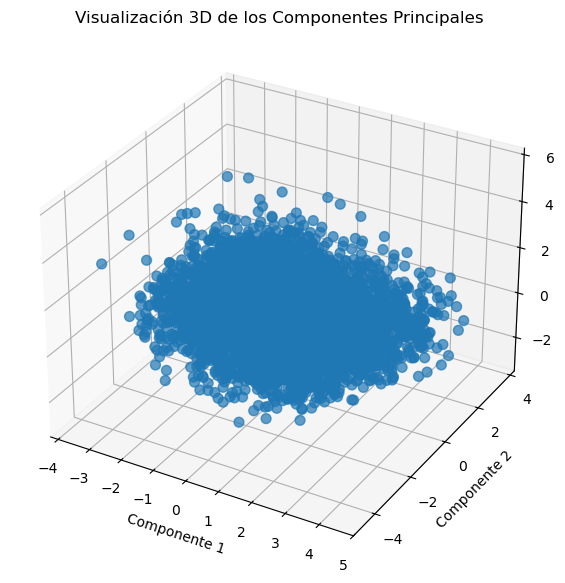

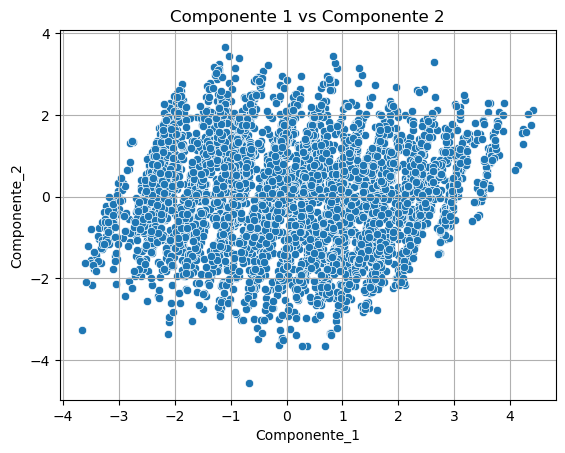

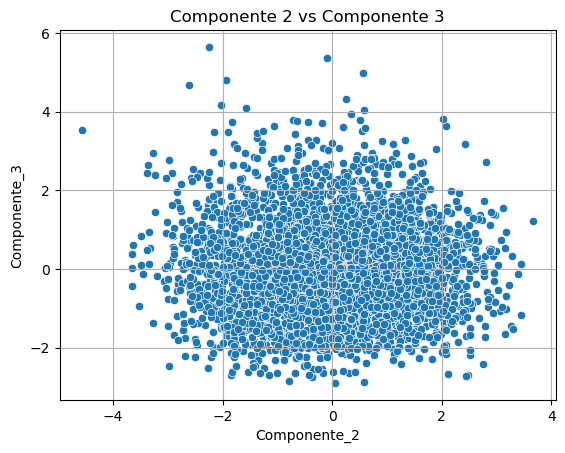

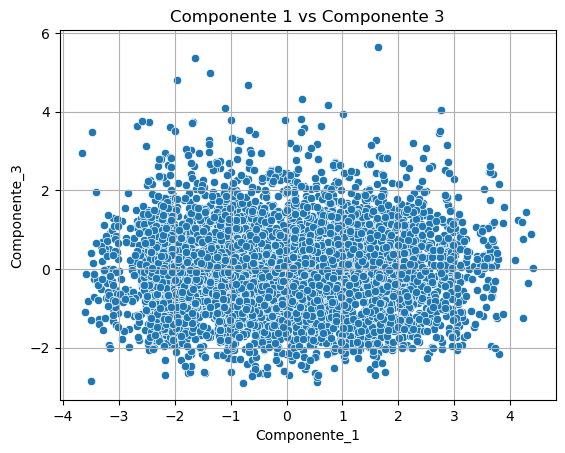

In [69]:
pca_final = PCA(n_components=n_retener)
data_proj = pca_final.fit_transform(scaled_data) 
df_pca = pd.DataFrame(data_proj, columns=[f"Componente_{i+1}" for i in range(n_retener)])


# --- 2. Gráfico 3D (Si aplica) ---
# Se verifica si hay al menos 3 componentes para poder graficar en 3D
if n_retener >= 3:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_pca["Componente_1"], df_pca["Componente_2"], df_pca["Componente_3"], s=50, alpha=0.7)
    ax.set_title("Visualización 3D de los Componentes Principales")
    ax.set_xlabel("Componente 1")
    ax.set_ylabel("Componente 2")
    ax.set_zlabel("Componente 3")
    plt.show()
else:
    print("No se generaron suficientes componentes (> 3) para graficar en 3D.")


# --- 3. Gráficos 2D (Siempre útiles) ---
# Gráfico de los dos primeros componentes
sns.scatterplot(x="Componente_1", y="Componente_2", data=df_pca).set_title("Componente 1 vs Componente 2")
plt.grid(True)
plt.show()

# Gráfico de los siguientes componentes (si existen)
if n_retener >= 3:
    sns.scatterplot(x="Componente_2", y="Componente_3", data=df_pca).set_title("Componente 2 vs Componente 3")
    plt.grid(True)
    plt.show()

    sns.scatterplot(x="Componente_1", y="Componente_3", data=df_pca).set_title("Componente 1 vs Componente 3")
    plt.grid(True)
    plt.show()
else:
    print("No hay suficientes componentes para graficar C2 vs C3 o C1 vs C3.")